# Battle of Neighborhoods

For finding a best location to start an Asian restaurant in London.

#### Import Required modules and libraries

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

#### 1) Read the "Population by ethinicty" data into a Pandas DataFrame.
Note: I have collected the Ethnic population of only 5 Asian Countries (India, Pakistan, China, Bangladesh and Srilanka) who are living in 33 Boroughs of London

In [2]:
# source: https://data.london.gov.uk/

df=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\Population_data.xlsx")
print(df.shape)
df.head()

(33, 9)


,Code,Borough,2012,2013,2014,2015,2016,2017,2018
0,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0
2,E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0
3,E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0
4,E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0


In [3]:
# City of London data is NOT AVAILABLE, need to drop that row
df=df.dropna()
print(df.shape)
df.head()

(32, 9)


,Code,Borough,2012,2013,2014,2015,2016,2017,2018
1,E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0
2,E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0
3,E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0
4,E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0
5,E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,15000.0


In [4]:
df = df.set_index(['Code']) #Set the Code as Index
print(df.shape)
df.head()

(32, 8)


,Borough,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0
E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0
E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,15000.0


In [5]:
# we have the population data of 7 years from 2012 to 2018, 
# So to get the Current population of the Asians living in London
# we will calculate the average of the existing population

df['Population'] = df.mean(numeric_only=True, axis=1)
print(df.shape)
df.head()

(32, 9)


,Borough,2012,2013,2014,2015,2016,2017,2018,Population
Code,,,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0,39428.571429
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0,56857.142857
E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0,13000.000000
E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0,105714.285714
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,15000.0,19000.000000


In [6]:
# Round off the values in Population column to match the existing data in our dataset
df.Population=df.Population.round()
df.head()

,Borough,2012,2013,2014,2015,2016,2017,2018,Population
Code,,,,,,,,,
E09000002,Barking and Dagenham,27000.0,32000.0,33000.0,41000.0,41000.0,48000.0,54000.0,39429.0
E09000003,Barnet,66000.0,43000.0,53000.0,54000.0,68000.0,57000.0,57000.0,56857.0
E09000004,Bexley,8000.0,7000.0,10000.0,15000.0,18000.0,16000.0,17000.0,13000.0
E09000005,Brent,109000.0,110000.0,99000.0,108000.0,106000.0,101000.0,107000.0,105714.0
E09000006,Bromley,19000.0,20000.0,20000.0,16000.0,17000.0,26000.0,15000.0,19000.0


In [7]:
# Finding the Borough, that has highest population
df.loc[df['Population'].idxmax()]

Borough       Newham
2012          144000
2013          146000
2014          143000
2015          128000
2016          147000
2017          144000
2018          166000
Population    145429
Name: E09000025, dtype: object

#### NOTE :As the Newham borough is having highest asian population, we will consider this borough as our preferred location for our asian restuarant

In [8]:
# Read the data of Newham borough as a separate DataFrame
df_Newham_asians = df.loc[df['Borough'] == 'Newham']
df_Newham_asians

,Borough,2012,2013,2014,2015,2016,2017,2018,Population
Code,,,,,,,,,
E09000025,Newham,144000.0,146000.0,143000.0,128000.0,147000.0,144000.0,166000.0,145429.0


#### 2. Read the "Weekly Earnings data of the asian Ethnicity in each borough" into a DataFrame

In [9]:
df_earn=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\earnings-residence-borough-1.xlsx")
print(df_earn.shape)
df_earn.head()

(33, 19)


,Code,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,E09000001,City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,901.6
1,E09000002,Barking and Dagenham,383.3,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
2,E09000003,Barnet,427.4,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
3,E09000004,Bexley,405.0,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
4,E09000005,Brent,368.4,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0


In [10]:
# Drop the row for Borough City of London, as there is no data for most of the years
df_earn=df_earn.dropna()
print(df_earn.shape)
df_earn.head()

(32, 19)


,Code,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,E09000002,Barking and Dagenham,383.3,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
2,E09000003,Barnet,427.4,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
3,E09000004,Bexley,405.0,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
4,E09000005,Brent,368.4,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0
5,E09000006,Bromley,440.1,449.2,461.2,464.8,479.5,506.3,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5


In [11]:
df_earn = df_earn.set_index(['Code'])
print(df_earn.shape)
df_earn.head()

(32, 18)


,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,
E09000002,Barking and Dagenham,383.3,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1
E09000003,Barnet,427.4,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6
E09000004,Bexley,405.0,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8
E09000005,Brent,368.4,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0
E09000006,Bromley,440.1,449.2,461.2,464.8,479.5,506.3,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5


#### As the Newham borough has highest asian population, we will consider the earnings data of only this borough.

#### Read the Earnings data for Newham borough

In [12]:
df_Newham_earnings = df_earn.loc[df_earn['Borough'] == 'Newham']
df_Newham_earnings

,Borough,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,,,,,
E09000025,Newham,338.2,343.4,371.0,383.2,390.9,390.8,403.0,421.6,422.4,382.5,369.8,387.6,393.7,421.6,436.7,471.3,479.1


#### 3) Read the existing "Licensed Restuarants in each borough" data into a DataFrame

In [13]:
df_Lic=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\licensed-restaurants-cafes-borough-1.xlsx")
print(df_Lic.shape)
df_Lic.head()

(33, 19)


,Code,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,E09000001,City of London,180,190,190,175,180,170,205,185,180,195,190,205,230,255,270,270,295
1,E09000002,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
2,E09000003,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
3,E09000004,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110
4,E09000005,Brent,120,125,130,120,125,145,155,140,145,150,155,165,170,165,185,200,190


In [14]:
# set Code as index 
df_Lic = df_Lic.set_index(['Code'])
print(df_Lic.shape)
df_Lic.head()

(33, 18)


,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,
E09000001,City of London,180,190,190,175,180,170,205,185,180,195,190,205,230,255,270,270,295
E09000002,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
E09000003,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
E09000004,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110
E09000005,Brent,120,125,130,120,125,145,155,140,145,150,155,165,170,165,185,200,190


In [15]:
# Drop the row for City of London, as there is no data of other datasets(population and weekly earning) for this borough
df_Lic = df_Lic.drop(["E09000001"],axis=0)
print(df_Lic.shape)
df_Lic.head()

(32, 18)


,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,
E09000002,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
E09000003,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
E09000004,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110
E09000005,Brent,120,125,130,120,125,145,155,140,145,150,155,165,170,165,185,200,190
E09000006,Bromley,145,150,150,155,165,175,165,165,170,175,160,180,185,180,180,190,200


#### As we have considered Newham borough as our preferred location for our restaurant, we will take the licensed restuarants data of Newham borough only.
Read the Newham borough restaurant data.

In [16]:
df_Newham_res = df_Lic.loc[df_Lic['Borough'] == 'Newham']
df_Newham_res

,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,
E09000025,Newham,45,55,50,60,75,85,85,80,75,80,75,95,110,110,120,120,125


#### 4.Read the "Rated Value per Sqm of the retail space in each borough of London" data into a DataFrame

In [17]:
df_value=pd.read_excel(r"C:\Users\user\Desktop\Capstone Project\Business-floorspace-1.xlsx")
print(df_value.shape)
df_value.head()

(33, 15)


,Code,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,E09000001,City of London,330,353,340,331,320,460,463,447,420,417,509,509,NaN
1,E09000002,Barking and Dagenham,84,84,84,85,85,103,103,105,103,103,137,139,NaN
2,E09000003,Barnet,152,151,149,149,148,181,182,184,184,183,239,240,NaN
3,E09000004,Bexley,97,97,98,96,96,118,117,116,116,116,137,139,NaN
4,E09000005,Brent,97,98,97,96,95,122,124,127,127,128,162,161,NaN


#### Note: These prices are Pounds per Square Metre in each borough, for the retail land space. As I had the Data Set for Retail, Industrial and Other land spaces, I have considered Restuarant Business as a Retail and hence took the Retail data from the dataset.

In [18]:
# set Code as index 
df_value = df_value.set_index(['Code'])
print(df_value.shape)
df_value.head()

(33, 14)


,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,
E09000001,City of London,330,353,340,331,320,460,463,447,420,417,509,509,NaN
E09000002,Barking and Dagenham,84,84,84,85,85,103,103,105,103,103,137,139,NaN
E09000003,Barnet,152,151,149,149,148,181,182,184,184,183,239,240,NaN
E09000004,Bexley,97,97,98,96,96,118,117,116,116,116,137,139,NaN
E09000005,Brent,97,98,97,96,95,122,124,127,127,128,162,161,NaN


In [19]:
# Drop the row for City of London, as there is no data of other datasets(population and weekly earning) for this borough
df_value = df_value.drop(["E09000001"],axis=0)
print(df_value.shape)
df_value.head()

(32, 14)


,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,
E09000002,Barking and Dagenham,84,84,84,85,85,103,103,105,103,103,137,139,NaN
E09000003,Barnet,152,151,149,149,148,181,182,184,184,183,239,240,NaN
E09000004,Bexley,97,97,98,96,96,118,117,116,116,116,137,139,NaN
E09000005,Brent,97,98,97,96,95,122,124,127,127,128,162,161,NaN
E09000006,Bromley,124,125,122,119,119,147,148,150,149,150,162,162,NaN


#### Note: For Earnings and Restuarants dataframe, I have taken the data of Newham borough, hence for Rated Value also, I will take the data of the same borough.

In [20]:
df_Newham_rv = df_value.loc[df_value['Borough'] == 'Newham']
df_Newham_rv

,Borough,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Code,,,,,,,,,,,,,,
E09000025,Newham,102,103,100,95,100,126,125,122,121,122,162,161,NaN


#### As I have the Rated Value data from 2006 to 2017, I have to predict what will be the rated value in 2018. I will use Linear Regression Machine Learning algorithm to predict the 2018 rated value.
I am taking the Earnings data and Licensed Restaurants data of "Newham" borough as the Independant Variables (X - variables) and will predict the Rated Value of the same borough and this predicted rated value becomes our Depedant Variable(Y-Variable)

# Machine Learning

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Transpose all the 3 DataFrames - Earnings-->"df_Newham_earnings", Licensed Restaurants-->"df_Newham_res" and Rated Value-->"df_Newham_rv"

#### 1.Earnings DataFrame - Data Cleaning and Preparation¶

In [22]:
#Round off the data in df_Newham_earnings dataframe

df_Newham_earnings = df_Newham_earnings.round()
df_inp1 = df_Newham_earnings.T.reset_index()
print(df_inp1.shape)
#df_inp1.head()

(18, 2)


In [23]:
# Rename the column names to Year and Earnings
df_inp1.rename(columns={'index':'Year', 'E09000025':'Earnings'},inplace=True)
print(df_inp1.shape)
#df_inp1.head()

(18, 2)


In [24]:
# Remove the first row and reset the index
df_inp1 = df_inp1.drop([0]).reset_index(drop=True)
print(df_inp1.shape)
df_inp1.head()

(17, 2)


Code,Year,Earnings
0,2002,338
1,2003,343
2,2004,371
3,2005,383
4,2006,391


#### 2. Licensed Restaurants Data cleaning and preparation

In [25]:
#Round off the data in df_Newham_res dataframe

df_Newham_res = df_Newham_res.round()
df_inp2 =df_Newham_res.T.reset_index()
print(df_inp2.shape)
#df_inp2.head()

(18, 2)


In [26]:
# Rename the column names to Year and Earnings
df_inp2.rename(columns={'index':'Year', 'E09000025':'No_of_Restaurants'},inplace=True)
print(df_inp2.shape)
#df_inp2.head()

(18, 2)


In [27]:
# Remove the first row and reset the index
df_inp2 = df_inp2.drop([0]).reset_index(drop=True)
print(df_inp2.shape)
df_inp2.head()

(17, 2)


Code,Year,No_of_Restaurants
0,2001,45
1,2002,55
2,2003,50
3,2004,60
4,2005,75


#### 3. Rated Value Data cleaning and preparation

In [28]:
#Round off the data in df_Newham_rv dataframe

df_Newham_rv = df_Newham_rv.round()
df_inp3 = df_Newham_rv.T.reset_index()
print(df_inp3.shape)
df_inp3.head()

(14, 2)


Code,index,E09000025
0,Borough,Newham
1,2006,102
2,2007,103
3,2008,100
4,2009,95


In [29]:
# Rename the column names to Year and Earnings
df_inp3.rename(columns={'index':'Year', 'E09000025':'Rated_Value'},inplace=True)
print(df_inp3.shape)
df_inp3.head()

(14, 2)


Code,Year,Rated_Value
0,Borough,Newham
1,2006,102
2,2007,103
3,2008,100
4,2009,95


In [30]:
# Remove the first row and reset the index
df_inp3 = df_inp3.drop([0]).reset_index(drop=True)
print(df_inp3.shape)
df_inp3.head()

(13, 2)


Code,Year,Rated_Value
0,2006,102
1,2007,103
2,2008,100
3,2009,95
4,2010,100


#### Now Merge all the 3 DataFrames of Earnings, Licensed Restaurants and Rated Value into a new DataFrame

In [31]:
df_final = pd.merge(pd.merge(df_inp1,df_inp2,on='Year'),df_inp3,on='Year')
print(df_final.shape)
df_final.head()

(12, 4)


Code,Year,Earnings,No_of_Restaurants,Rated_Value
0,2006,391,85,102
1,2007,391,85,103
2,2008,403,80,100
3,2009,422,75,95
4,2010,422,80,100


In [32]:
df_final = df_final.set_index(['Year']) # set year as inde
df_final

Code,Earnings,No_of_Restaurants,Rated_Value
Year,,,
2006,391,85,102
2007,391,85,103
2008,403,80,100
2009,422,75,95
2010,422,80,100
2011,382,75,126
2012,370,95,125
2013,388,110,122
2014,394,110,121


### Data Exploration

In [33]:
df_final = df_final.apply(pd.to_numeric, errors='coerce')
#print(df_final)
df_final.describe()

Code,Earnings,No_of_Restaurants,Rated_Value
count,12.000000,12.000000,12.000000
mean,407.750000,96.666667,119.916667
std,28.149358,19.108938,22.467991
min,370.000000,75.000000,95.000000
25%,390.250000,80.000000,101.500000
50%,398.500000,90.000000,121.500000
75%,422.000000,112.500000,125.250000
max,471.000000,125.000000,162.000000


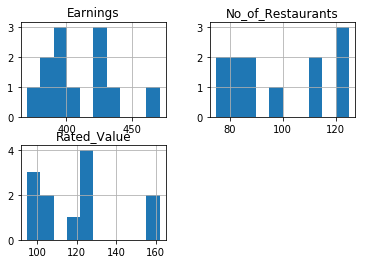

In [34]:
viz = df_final[['Earnings','No_of_Restaurants', 'Rated_Value']]
viz.hist()
plt.show()

### Simple Linear Regression Model
Linear Regression fits a linear model with coefficients θ=(θ1,...,θn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

Let's plot a Scatter Plot between these 2 features with the Target variable "Rated Value"

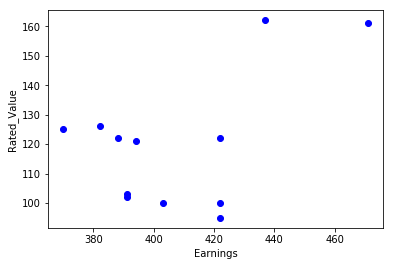

In [35]:
# Plot between Earnings and Rated value
plt.scatter(df_final.Earnings, df_final.Rated_Value, color='blue')
plt.xlabel("Earnings")
plt.ylabel("Rated_Value")
plt.show()

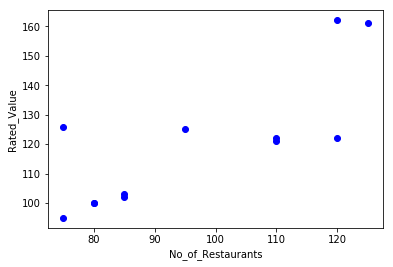

In [36]:
# Plot between No of Restuarants and Rated value

plt.scatter(df_final.No_of_Restaurants, df_final.Rated_Value, color='blue')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")
plt.show()

##### From the above 2 Scatter Plots, it is observed that the Linear relationship exists between the Restaurants and the Rated Value. A scatter plot clearly shows the relation between variables where changes in one variable explain or possibly cause changes in the other variable. Also, it indicates that these variables are linearly related.

##### With linear regression you can fit a line through the data. For instance, as the number of restaurants increases, so do the Rated value. With linear regression you can model the relationship of these variables. A good model can be used to predict what the approximate rated value of the location.

### Creating train and test dataset

#### As we do not have the Rated Value for the Year 2018 and we need to predict this value using the Simple Linear Regression model, hence we will remove this Year 2018 data from the final dataframe and prepare the Train and Test data from the remaining data

In [37]:
df_final=df_final.dropna()
df_final

Code,Earnings,No_of_Restaurants,Rated_Value
Year,,,
2006,391.0,85,102
2007,391.0,85,103
2008,403.0,80,100
2009,422.0,75,95
2010,422.0,80,100
2011,382.0,75,126
2012,370.0,95,125
2013,388.0,110,122
2014,394.0,110,121


In [38]:
msk = np.random.rand(len(df_final)) < 0.75
train = df_final[msk]
test = df_final[~msk]
print(train)

Code  Earnings  No_of_Restaurants  Rated_Value
Year                                          
2006     391.0                 85          102
2007     391.0                 85          103
2008     403.0                 80          100
2010     422.0                 80          100
2011     382.0                 75          126
2012     370.0                 95          125
2014     394.0                110          121
2015     422.0                120          122
2016     437.0                120          162
2017     471.0                125          161


In [39]:
print(test)

Code  Earnings  No_of_Restaurants  Rated_Value
Year                                          
2009     422.0                 75           95
2013     388.0                110          122


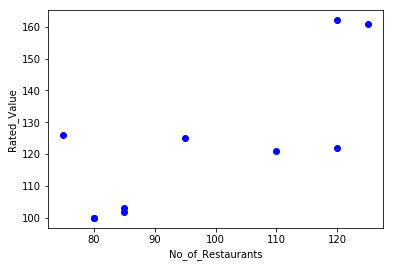

In [40]:
# Train Data Distribution

plt.scatter(train.No_of_Restaurants, train.Rated_Value,  color='blue')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")
plt.show()

### Modelling

In [41]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["No_of_Restaurants"]])
train_y = np.asanyarray(train[["Rated_Value"]])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.92788104]]
Intercept:  [31.73159851]


### Draw the best fit line (Intercept line) to our train data

Text(0, 0.5, 'Rated_Value')

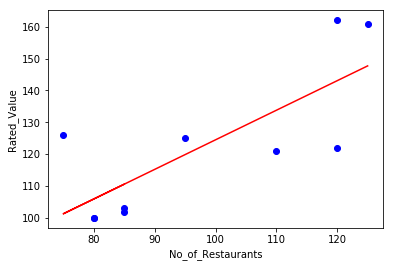

In [42]:
plt.scatter(train.No_of_Restaurants, train.Rated_Value,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("No_of_Restaurants")
plt.ylabel("Rated_Value")

#### Conclusion: By seeing the above Scatter Plot with a best possible fit line, the Rated Value in Newham borough for the year 2018 can be predicted somewhere between 160 to 165

## Evaluation

In [43]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['No_of_Restaurants']])
test_y = np.asanyarray(test[['Rated_Value']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 9.06
Residual sum of squares (MSE): 89.59
R2-score: 0.66
